In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree
#...

## Loading the datasets

In [2]:
# Loading the main dataset and print it
dataset = pd.read_csv('./arabic_dataset.csv', delimiter=";", index_col=0)
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Loading the competition set and print it
competition = pd.read_csv('./competition.csv', delimiter=";", index_col=0)

In [4]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


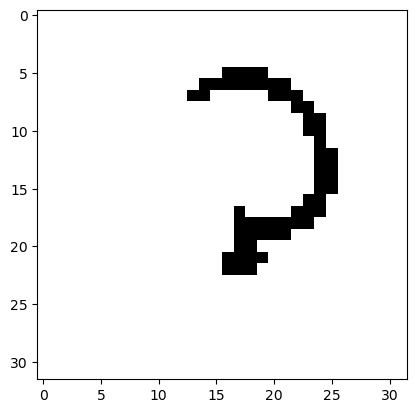

In [4]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(dataset.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

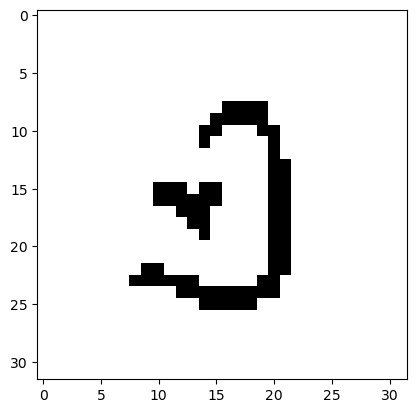

In [5]:
# Same with the image 0 of competition
idx = 0
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# First guided submission to Kaggle

In [7]:
import random
pred = random.choices(np.unique(dataset.label), k=500)
pred
# pred is a vector with 500 random values from the set of possible label values 
# we will assume that these are our 500 predictions for the competition set

[2,
 16,
 22,
 1,
 1,
 6,
 22,
 18,
 12,
 18,
 12,
 18,
 16,
 18,
 6,
 18,
 22,
 18,
 18,
 12,
 1,
 12,
 12,
 18,
 2,
 22,
 22,
 2,
 16,
 18,
 22,
 12,
 2,
 12,
 22,
 1,
 2,
 2,
 6,
 22,
 1,
 18,
 2,
 6,
 1,
 6,
 6,
 2,
 16,
 6,
 18,
 18,
 22,
 6,
 12,
 1,
 1,
 16,
 6,
 2,
 12,
 12,
 6,
 12,
 16,
 22,
 16,
 6,
 22,
 16,
 12,
 16,
 6,
 2,
 2,
 18,
 12,
 2,
 2,
 2,
 1,
 18,
 22,
 12,
 1,
 2,
 6,
 22,
 1,
 6,
 1,
 22,
 2,
 18,
 22,
 22,
 2,
 22,
 1,
 2,
 2,
 22,
 16,
 18,
 12,
 12,
 12,
 1,
 16,
 22,
 12,
 1,
 22,
 2,
 12,
 22,
 18,
 2,
 18,
 18,
 2,
 1,
 1,
 16,
 12,
 16,
 12,
 6,
 2,
 6,
 18,
 12,
 16,
 2,
 16,
 18,
 16,
 6,
 1,
 2,
 1,
 12,
 22,
 2,
 16,
 16,
 2,
 22,
 22,
 16,
 2,
 18,
 12,
 18,
 12,
 16,
 6,
 12,
 12,
 12,
 12,
 2,
 18,
 6,
 6,
 18,
 1,
 18,
 22,
 12,
 12,
 6,
 1,
 2,
 1,
 18,
 16,
 16,
 2,
 16,
 1,
 18,
 22,
 12,
 12,
 16,
 6,
 16,
 1,
 6,
 2,
 22,
 18,
 6,
 12,
 16,
 6,
 2,
 2,
 16,
 22,
 2,
 6,
 16,
 2,
 18,
 1,
 12,
 12,
 2,
 6,
 1,
 6,
 2,
 12,
 16,
 2,
 16,
 16

In [8]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df


,Id,label
0,1,2
1,2,16
2,3,22
3,4,1
4,5,1
...,...,...
495,496,18
496,497,6
497,498,12
498,499,1


In [30]:
# then save it to a csv file
df.to_csv('myfirstsubmission.csv', index=False)
# You should now have a csv file on your working directory
# Go on Kaggle website, join the competition and drag this file into 'Submit predictions'. You should have a score
# This score might not be high because we have just done random predictions
# but when you'll design classifiers and make more clever predictions you will improve your score
# Later, when you'll have found an interesting classifier for each family, you have to predict the competition set
# with this classifier, put these predictions into a vector (like pred above) and apply the same procedure as
# in the previous cell

## Part 1 : preliminar analysis of the dataset

In [9]:
# TODO

In [14]:
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### La ligne de code ci-dessous permet de faire une description des données.
### Le tableau qui en résulte permet de voir le nombre de lignes dans le jeu de données, ainsi que la moyenne, l'écart ect.

In [11]:
dataset.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,1700.000000,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,...,1700.0,1700.000000,1700.0,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,11.017647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001176,0.0,0.001765,0.002941,0.001176,0.000588,0.001176,0.002353,0.002353
std,7.550554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.034290,0.0,0.041984,0.054169,0.034290,0.024254,0.034290,0.048464,0.048464
min,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### La ligne de code suivant permet de voir la distribution des labels au niveau de ce jeu de données. On peut voir que presque tous les labels sont représentés avec à peu près la même quantité. On a une bonne distribution des labels

In [13]:
dataset.label.value_counts()

12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: label, dtype: int64

### Le jeu de données contient 1700 images en noir et blanc de taille 32X32 qui representent les caractères de l'alphabet arabe. Nous avons au total 1700 lignes et 1025 colonnes dont les 1024 colonnes avec comme dénomination pixel_n representent les pixesl de chaque image et une colonne label ayant comme valeurs (1,2,6,12,16,18, 22) qui correspond au caractère représenté par l'image. Avec une distribution acceptable des labels

### Le travail à faire est de déterminer pour un caractère donné sa classe d'appartenance ( 1,2,6,12,16,18, 22) via un modèle qu'on a entrainé sur le jeu de donnés fourni . Pour cela nous allons utiliser des modèles de classification afin de déterminer celui qui classe les images avec le moins d'erreurs. Nous allons subdiviser nos données en trainning, validation et test. Le trainning set servira à entraîner nos modèles, le validation set permettra de sélectionner le meilleure modèle et le test set permettra de sélectionner le meilleur modèle classifieur en regardant son erreur de généralisation.

## Part 2 : classifiers based on raw images

### Decision trees

## Arbre de décision c'est quoi ?: 
### Un arbre de décision est un algorithme de machine learning  qui permet de représenter sous forme  graphique un arbre de façon à faire apparaître l'extrémité de chaque branche les différents résultats possibles en fonction des décisions prises à chaque étape

#### Nous allons diviser les données en train, validation et test. 70% pour le tain set et 15% - 15% pour le validation et test set

In [24]:
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset.iloc[:,1:])
# Apply it to X
X = scaler.transform(dataset.iloc[:,1:])
X = pd.DataFrame(X, columns=dataset.columns[1:])
X.index = X.index + 1
X.insert(0,'label',dataset.label)
X

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
2,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
1697,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
1698,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564
1699,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.03432,0.0,-0.042046,-0.054313,-0.03432,-0.024261,-0.03432,-0.048564,-0.048564


In [60]:
arabic_train, arabic_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
arabic_valid, arabic_test = train_test_split(arabic_test, test_size = 0.5, random_state = 4)

### Nous allons entraîner le modèle

In [22]:
arabic_dt = tree.DecisionTreeClassifier().fit(arabic_train.iloc[:,1:],arabic_train.label)

### Visualisons l'arbre obtenu

[Text(0.8619513872952186, 0.9827586206896551, 'x[689] <= 0.5\ngini = 0.857\nsamples = 1190\nvalue = [157, 158, 184, 177, 168, 169, 177]'),
 Text(0.7678239111245707, 0.9482758620689655, 'x[486] <= 0.5\ngini = 0.85\nsamples = 934\nvalue = [151, 107, 176, 99, 94, 159, 148]'),
 Text(0.693187207095353, 0.9137931034482759, 'x[754] <= 0.5\ngini = 0.849\nsamples = 851\nvalue = [98, 107, 166, 99, 88, 147, 146]'),
 Text(0.6132123736805783, 0.8793103448275862, 'x[783] <= 0.5\ngini = 0.838\nsamples = 711\nvalue = [95, 64, 164, 81, 57, 144, 106]'),
 Text(0.5595080181788611, 0.8448275862068966, 'x[626] <= 0.5\ngini = 0.82\nsamples = 611\nvalue = [94, 43, 163, 53, 42, 141, 75]'),
 Text(0.5162403424342413, 0.8103448275862069, 'x[848] <= 0.5\ngini = 0.796\nsamples = 519\nvalue = [75, 40, 158, 38, 21, 135, 52]'),
 Text(0.4773419001723087, 0.7758620689655172, 'x[913] <= 0.5\ngini = 0.785\nsamples = 497\nvalue = [75, 34, 158, 37, 21, 135, 37]'),
 Text(0.4175495167737247, 0.7413793103448276, 'x[562] <= 0.5

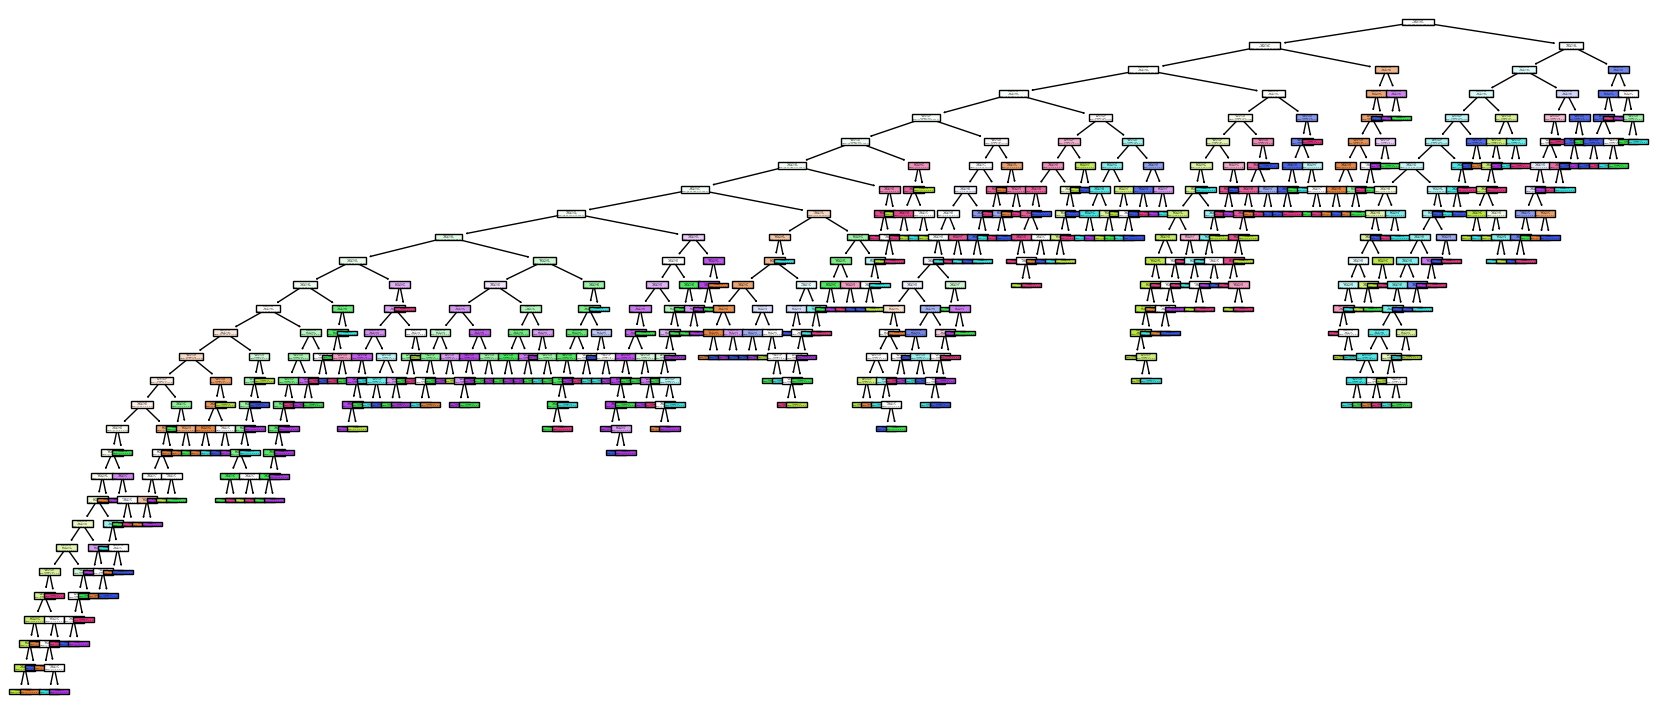

In [23]:
plt.figure(figsize=(21, 9))
tree.plot_tree(arabic_dt, filled=True)

### On voit qu'on a un arbre complet

### Calcul du score sur le jeu d'entraînement

In [20]:
arabic_dt.score(arabic_train.iloc[:,1:],arabic_train.label)

1.0

### On se retrouve avec un score de 100% sur le jeu de test ce qui est normal pour un arbre complet

### Nous allons maintenant calculer le score sur le jeu de validation

In [24]:
arabic_dt.score(arabic_valid.iloc[:,1:],arabic_valid.label)

0.5176470588235295

### Oups ! on voit que 51% n'est pas fameux comme score. On dirait qu'on fait face à un phénomène surnommé le SURAPPRENTISSAGE

### On va faire une prédiction du premier image pour voir ce que ça donne

In [30]:
# On récupère le 1er image du jeu de validation
arabic_valid.iloc[1:2,:]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
323,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
arabic_dt.predict(arabic_valid.iloc[1:2,1:].to_numpy().reshape(1,-1))[0]

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


22

### Le bon label est 16 alors que le modèle prédit 22

### Pour remédier à ce phénomène nous allons procéder à ce qu'on appelle l'élagage de l'arbre. C'est à dire nous allons indiquer au modèle d'arbre de tolérer des erreurs. 

### L'arbre de décision complet n'est composé que de feuilles pures, ce qui peut parfois conduire à un modèle trop complexe. Afin de simplifier le modèle, nous pouvons élaguer l'arbre. 
### pour le faire en Python (avec le package sklearn) on utilise un facteur de complexité alpha qui pénalise le nombre de nœuds dans l'arbre.
### Si alpha est nul, il n'y a pas de pénalité pour le nombre de nœuds. C'est comme le modèle de base. Mais lorsque alpha augmente, il pénalise davantage le nombre de nœuds et essaie donc de créer des arbres avec moins de nœuds (et donc avec des feuilles qui ne sont pas toujours pures).
### Les valeurs de alpha à prendre en compte dépendent du jeu de données. On peut obtenir toutes les valeurs possibles de alpha pour un jeu de données donné par les commandes suivantes

In [34]:
clf_tree = tree.DecisionTreeClassifier() # first declare a tree
path_arabic = clf_tree.cost_complexity_pruning_path(arabic_train.iloc[:,1:], arabic_train.label) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path_arabic['ccp_alphas']

array([0.        , 0.00078031, 0.00078782, 0.00080032, 0.00081487,
       0.00081822, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
       0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
       0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
       0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
       0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
       0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
       0.00084034, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
       0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
       0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
       0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.0012605 ,
       0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
       0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
       0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
       0.0012605 , 0.00130719, 0.00131702, 0.00134454, 0.00134

### Ci-dessus on a l'ensemble des valeurs alplha pour ce jeu de donnés 

In [35]:
arabic_pruned_models = []
arabic_pred_scores = []
arabic_val_scores = []
for aplha in path_arabic.ccp_alphas:
    dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=aplha).fit(arabic_train.iloc[:,1:], arabic_train.label)
    p_score = dt_pruned.score(arabic_train.iloc[:,1:], arabic_train.label)
    v_score = dt_pruned.score(arabic_valid.iloc[:,1:], arabic_valid.label)
    arabic_pred_scores.append(p_score)
    arabic_val_scores.append(v_score)
    arabic_pruned_models.append(dt_pruned)

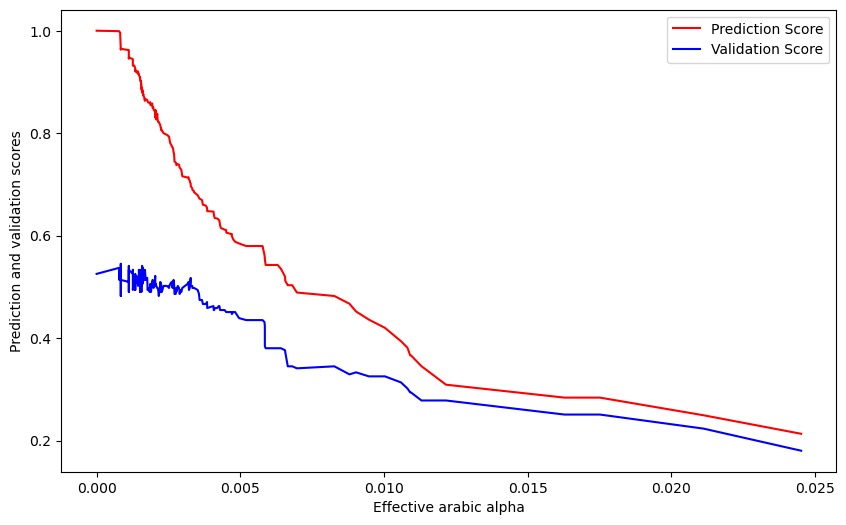

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(path_arabic.ccp_alphas, arabic_pred_scores,color='red',label='Prediction Score')
plt.plot(path_arabic.ccp_alphas,arabic_val_scores,color='blue',label='Validation Score')
plt.xlabel("Effective arabic alpha")
plt.ylabel("Prediction and validation scores")
plt.legend()
plt.show()

### On a crée plusieurs arbre de décisions sur la base des alphas générés
### Ci-dessus on le graphique qui montre l'évolution classique des scores d'entrainement et de validation suivant la compléxité du modèle(valeur de alpha). 
### On remarque que plus on avance dans l'élagage plus le modèle s'autorise à faire des errreurs.

### Nous allons maintenat choisir le meilleur modèle d'arbre en prenant le score maximal en validation

In [39]:
best_alpha = arabic_val_scores.index(max(arabic_val_scores))
best_arabic_tree_model = arabic_pruned_models[best_alpha]

In [45]:
best_arabic_tree_model

DecisionTreeClassifier(ccp_alpha=0.0008403361344537816)

### Calculons le score du modèle sélectionné sur le jeu de données d'entraînement

In [46]:
best_arabic_tree_model.score(arabic_train.iloc[:,1:], arabic_train.label)

0.9638655462184874

### On se retrouve avec un score de 96%. Et pourquoi pas 100% ?Lle score n'est pas éfal 100% car l'abre n'arrive pas a aller jusqu'au bout elle s'arrête un peu avant du fait de l'élagage

### Calculons le score du meilleur modèle sur le jeu de test. Ça nous permet d'estimer la capacité de généralisation du modèle sélectionné

In [42]:
best_arabic_tree_model.score(arabic_test.iloc[:,1:],arabic_test.label)

0.5333333333333333

### On voit que le meilleur modèle d'arbre sélectionné a une mauvaise capacité de généralisation. Peut-être que l'utilisation des arbres n'est pas adapté au jeu de données fournis.
### Pour vérifier celà nous allons par la suite utiliser d'autres familles d'algorithme de classification

### Faisons les prédictions par le modèle sélectionné sur le jeu competition et soumettons sur Kaggke

In [50]:
competition.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
predictions_tree = best_arabic_tree_model.predict(competition)
predictions_tree

array([22,  1, 12, 16, 16, 18, 22, 16, 18,  1,  2,  6,  6, 22, 18,  1,  2,
        6, 18, 12, 16,  1,  6, 22, 12,  1, 16,  6, 22,  2, 18,  2,  6,  1,
        1,  2,  1,  1,  1, 18, 22, 22,  6,  6,  2,  1,  6, 22, 18, 18,  6,
        1, 16,  2, 18,  1, 22,  2, 12, 18,  1, 16,  2,  1, 18,  6,  2, 22,
       12, 12, 18,  6, 22,  6, 18,  6,  2,  6,  1,  1, 22, 22,  2,  6, 22,
        6,  1,  2, 16,  2, 12, 18, 22,  6,  6,  2,  1, 16,  2, 12, 16, 12,
       16,  6, 22, 12,  1, 22, 18,  2, 22, 22,  2, 22, 16,  2,  1, 12,  6,
       18,  1,  1, 22, 16, 12, 12,  1, 16,  6,  2,  6, 22, 18, 22,  2, 18,
       18,  2,  1, 16, 22, 12, 16,  6,  2,  6,  6, 22, 12, 18, 18,  6,  1,
        6, 16, 18,  6, 16,  2, 12,  1, 22,  1,  6, 16, 22,  6, 12,  1, 18,
        6, 12,  2, 16, 16, 16, 22,  6,  2,  1,  6, 22,  1, 18, 12,  2, 22,
        1, 18, 16, 18,  1,  1, 16,  6,  6, 18,  1,  2,  2,  1, 18, 12,  2,
        2,  6,  1,  1, 18, 16,  2, 16,  1,  1, 12,  1, 18,  1, 12,  2,  2,
        1,  6, 12, 22,  1

In [52]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = predictions_tree
df
df.to_csv('tree_prediction_submission.csv', index=False)


### Après soumission sur Kaggle, le modèle a obtenu un score de 0.52. Ce qui n'est pas très fameux

### SVM

## SVM c'est quoi ?: 
### Les SVM sont également appelés « classifieurs à vaste marge » font partis de la famille d'algorithme de machine learning.Leur objectif est de trouver l’hyperplan séparateur optimal qui maximise la marge entre les classes dans un espace de grande dimension. La marge est la distance entre la frontière de séparation et les échantillons les plus proches, ces derniers sont appelés vecteurs supports. Les SVM sont caractérisés par l’hyperplan séparateur optimal qui maximise la marge.

## Comment ça marche ? :
### Dans le fonctionnement des SVM on rencontre deux cas. Le premier cas les données sont linéairement séparables, il est donc possible de trouver facilement un classificateur linéaire. Le second cas les données ne sont pas linéairement séparables. Dès lors on change de dimension. Cette transformation non linéaire est réalisée via l'astuce noyau.


In [ ]:
# Nous avons fait une estimation d'un modèle SVM sur les données d’apprentissage par variation de la constante de régulation C, ensuite introduction du noyau gaussien et polynomial.Nous avons etudier les deux cas possibles linéaire et non linéaire.

In [39]:
from sklearn import svm

In [57]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## SVM linéaire

### On va d'abord expérimenté le SVM linéaire pour voir ce que ça donne
### Le même procédé sera utilisé comme sur l'exercice précedent
### Nous sélections différents valeurs C (0.01, 0.05, 1, 10, 50, 100, 500, 1000) pour entraîner notre modèle et choisisons le meilleur en validation

In [40]:
pruned_lin_svm = []
pred_scores = []
val_scores = []
c_estimators = [0.01, 0.05, 1, 10, 50, 100, 500, 1000]
for n_estimator in c_estimators:
    svm_pruned = svm.SVC(C = n_estimator, kernel = 'linear').fit(arabic_train.iloc[:,1:], arabic_train.label)
    p_score = svm_pruned.score(arabic_train.iloc[:,1:], arabic_train.label)
    v_score = svm_pruned.score(arabic_valid.iloc[:,1:], arabic_valid.label)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_lin_svm.append(svm_pruned)

In [41]:
best_estimator = val_scores.index(max(val_scores))
best_svm = pruned_lin_svm[best_estimator]
best_svm

SVC(C=0.01, kernel='linear')

### On voit ici que le meilleur modèle svm lineaire est celui avec C=0.05

### Calculons le score sur le jeu d'entraînement

In [44]:
best_svm.score(arabic_train.iloc[:,1:], arabic_train.label)

0.9680672268907563

In [57]:
best_svm.score(arabic_train.iloc[:,1:], arabic_train.label)

0.9218487394957983

### Calculons le score du meilleur modèle sur le jeu de test. Ça nous permet d'estimer la capacité de généralisation du modèle sélectionné


In [46]:
# After Sclaing
best_svm.score(arabic_test.iloc[:,1:],arabic_test.label)

0.7686274509803922

In [58]:
best_svm.score(arabic_test.iloc[:,1:],arabic_test.label)

0.7686274509803922

### Avec un score de 77%, on voit que le modèle SVM linéaire fait mieux les arbres de décisions

In [59]:
predictions_svm = best_svm.predict(competition)
predictions_svm

array([22, 16, 16, 18, 16,  6, 22, 22, 18, 18,  2,  6, 22, 22,  6,  1,  6,
        6, 18, 12,  2,  1, 16, 12, 12,  1, 16, 18,  2,  2,  1,  2, 18,  1,
       18,  2,  1,  2,  1, 18, 16, 22,  2,  6,  2, 12,  6, 22,  6, 18,  6,
        1, 12, 12, 18, 12, 18,  2, 12, 18,  6, 22,  6, 22, 18, 18,  2, 22,
       16, 16, 18,  6, 22,  6, 18, 18,  2, 22,  6,  1, 22,  2,  1,  6, 22,
       18,  1,  2,  6,  2, 22, 22, 22, 22, 22, 22,  1, 22, 22, 12, 22, 12,
       16, 18, 22,  6,  6,  2, 18,  2,  2,  2,  2,  1, 16,  2,  1, 16, 18,
       18,  1,  6, 22, 16, 12, 16,  1,  2, 22,  2,  6, 22, 18,  6,  2,  2,
       18,  2,  1, 12, 22, 18, 12,  2, 22, 18,  6, 22, 12,  6,  6,  6,  1,
        6, 16,  6,  6, 16,  2, 12,  1,  6, 22, 18, 16, 22,  6, 16,  1,  1,
        1,  2,  2, 16, 16,  6, 22,  6,  2,  1,  1,  2,  1, 18, 12, 12, 12,
        2, 18, 16, 18,  1,  1, 16,  6,  6,  6,  1, 22,  2,  1, 18, 22,  2,
        2,  6,  1,  1, 12, 12, 16,  6,  1,  6,  6,  6, 18, 18, 12,  2,  1,
        1, 18,  6,  6,  2

In [60]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = predictions_svm
df
df.to_csv('svm_lin_prediction_submission.csv', index=False)


### Après soumission sur Kaggle, le modèle a obtenu un score de 0.685. Ce qui n'est pas très fameux mais mieux que les arbres

## SVM polynomiale

In [47]:
pruned_poly_svm = []
pred_scores = []
val_scores = []
c_estimators = [0.01, 0.05, 1, 10, 50, 100, 500, 1000]
for n_estimator in c_estimators:
    svm_pruned = svm.SVC(C = n_estimator, kernel = 'poly').fit(arabic_train.iloc[:,1:], arabic_train.label)
    p_score = svm_pruned.score(arabic_train.iloc[:,1:], arabic_train.label)
    v_score = svm_pruned.score(arabic_valid.iloc[:,1:], arabic_valid.label)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_poly_svm.append(svm_pruned)

In [48]:
best_estimator = val_scores.index(max(val_scores))
best_poly_svm = pruned_poly_svm[best_estimator]
best_poly_svm

SVC(C=500, kernel='poly')

### On voit ici que le meilleur modèle svm lineaire est celui avec C=50

### Calculons le score sur le jeu d'entraînement

In [49]:
best_poly_svm.score(arabic_train.iloc[:,1:], arabic_train.label)

1.0

In [74]:
best_poly_svm.score(arabic_train.iloc[:,1:], arabic_train.label)

1.0

### Calculons le score du meilleur modèle sur le jeu de test. Ça nous permet d'estimer la capacité de généralisation du modèle sélectionné

In [50]:
best_poly_svm.score(arabic_test.iloc[:,1:],arabic_test.label)

0.796078431372549

In [75]:
best_poly_svm.score(arabic_test.iloc[:,1:],arabic_test.label)

0.7803921568627451

In [67]:
# we put this predictions in a DataFrame with the right format expected by kaggle
predictions_poly_svm = best_poly_svm.predict(competition)
print(predictions_poly_svm)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = predictions_poly_svm
df
df.to_csv('svm_poly_prediction_submission.csv', index=False)


[22 16 16 16 16  6 18  1  6  6  2  6  6  2  6  1  1 18 18  1  2  1 16 22
 12  1 16 18  1  1  6  2  6  1 18  2  1  1  1 18 16 22  2 18  2 16  1 22
  1 18  6  1 12 12 18  1 18  2 12 18  1  2  1 12  6 18  2 22 16 16 18  1
 12  6  2 18  2 22  1  1 22 22  1  6 22  6  1 12  6  2 22 22 22  1  2 22
  1  2  2 12 16 12 16  6 22 22  2  2 18  2  1  2  2  1 16  2  1 16  6 18
  1 22 22 16  1 16  1  2 22  2  6 22 18 12 12  1 18  2  1  2  2 18 22  1
 22  1  6 22 12  6  6 18  1 18 16  1 18 16  2  1  1 18 22 18 16  2  1 16
  1  1  6  1  2 16 16  6 22 12  2  1  1  2  1  6 12 12 22  2 18 16 18  1
  1  6  6  6  1  1  2  2  1 18  2  2  2  1  1  1 12 12 12  6  1  1 18 18
 18 18 12  2  1  1 18 22  1  1  1  1  2  6  6 16 22  6  1 16  2  1  6 22
 22 16  2 18  6 22  2 18 18  1  2  1 22  2  1 12 12  2 16 18  2  1  6 12
  6  2  6  2  2 18  6  2  1 22  1  1  6 18  2  2 12  6  2  6  2  6 18 18
  1 18 12  2 22 16 16 18  1  2 22 16  1  6 12  6  2  6 16  2  2  2 12  6
 16  1 18  2 12 16 22  1  1  6  6 22 12 18 18  2  6

## SVM Gaussien

In [65]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01,1e-2, 1e-3, 1e-4],
                     'C': [0.01,5,10]}]
# hyper_params = [ {'gamma': [0.01, 0.05, 1, 5, 10],
#                      'C': [0.01, 0.05, 1, 10, 50, 100, 500, 1000]}]

# specify model
model = svm.SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  
# fit the model
model_cv.fit(arabic_train.iloc[:,1:], arabic_train.label)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.01, 5, 10],
                          'gamma': [0.01, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [67]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7621848739495798 corresponding to hyperparameters {'C': 5, 'gamma': 0.01}


In [68]:
best_svm_pruned = svm.SVC(C = 5, kernel = 'rbf',gamma=0.01).fit(arabic_train.iloc[:,1:], arabic_train.label)

In [70]:
best_svm_pruned.score(arabic_test.iloc[:,1:],arabic_test.label)

0.8392156862745098

In [72]:
# we put this predictions in a DataFrame with the right format expected by kaggle
predictions_rbf_svm = best_svm_pruned.predict(competition)
print(predictions_rbf_svm)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = predictions_rbf_svm
df
df.to_csv('svm_rbf_2_prediction_submission.csv', index=False)


[22 16 16 16 16  6 18 22  6  6  2  6  6 22  6  1 22  6 18 12  2  1 16 12
 12  1 16 18  1  2  6  2 18  1 18  2  1  2  1 18 16 22  2  6  2 12  6 22
  6 18  6  1 12 12 18 12 18  6 22 18  6 22  6 12 18 18  2 22 16 16 18  6
 16  6 18 18  2 22 18  1 22  2  1  6 22  6  1 12  6  2 22 22 22 22  2 22
  1 22 22 12 12 12 16  6 22 16  1  2 18  2 22  2  2  1 16  2  1 16 18 18
  1  6 22 16 12 16  1  2 22  2  6 22 18 22 12  2 18  2  1 12 22 18 22  2
 22 18  6 22 12  6  6 18  1 18 16 18 18 16  2 22  1 18 22 18 16 22  6 16
  1  1 18  2  2 16 16  6 22  6  2  1  1 16  1  6 12 12 22  2 18 16 18  1
  1  6  6  6 12  1 22  2  1 18 22  2  2  6  1  1 12 12 16  6  1  6 18  6
 18 18 12  2  1  1 18 22 22  2  1  1  2  6  6 16 22  6  6 16 22  1 18 22
 22 16  2 18  6 22 22 18  6  1  6 18 22  2 16 12 12  2 16 18  2  1  6 16
  6  6  6  2  2 18  6  2 22 22 18  6  6  6  2 22 12  6 12  6  2  6 22 18
  1 18 12 22 22 16 16 18  1  2 22 16  2  6 12  6 16  6 16  2  2  2 12  6
 18 18  6  2 12 16 22  6  1  6  6 22 12 18 18  2  6

### Même procédé que précedemment. Nous allons varier Gamma et C pour voir le meilleur modèle.

In [51]:
pruned_models_g = []
pred_scores = []
val_scores = []
c_estimators = [0.01, 0.05, 1, 10, 50, 100, 500, 1000]
g_estimators = [0.01, 0.05, 1, 5, 10]
for n_estimator in c_estimators:
    for g in g_estimators:
        svm_pruned = svm.SVC(C = n_estimator, kernel = 'rbf',gamma=g).fit(arabic_train.iloc[:,1:], arabic_train.label)
        p_score = svm_pruned.score(arabic_train.iloc[:,1:], arabic_train.label)
        v_score = svm_pruned.score(arabic_valid.iloc[:,1:], arabic_valid.label)
        pred_scores.append(p_score)
        val_scores.append(v_score)
        pruned_models_g.append(svm_pruned)

In [53]:
best_estimator = val_scores.index(max(val_scores))
best_svm = pruned_models_g[best_estimator]
best_svm

SVC(C=10, gamma=0.01)

In [55]:
best_svm.score(arabic_test.iloc[:,1:],arabic_test.label)

0.5450980392156862

In [79]:
# we put this predictions in a DataFrame with the right format expected by kaggle
predictions_rbf_svm = best_svm.predict(competition)
print(predictions_rbf_svm)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = predictions_rbf_svm
df
df.to_csv('svm_rbf_prediction_submission.csv', index=False)


[22 16 16 16 16  6 18 22  6  6  2  6  6 22  6  1 22  6 18 12  2  1 16 12
 12  1 16 18  1  1 18  2 18  1 18  2  1  2  1 18 16 22  2 18  2 12  6 22
  6 18 18  1 12 12 18 12 18  6 22 18  6 22  6 12 18 18  2 22 16 16 18  6
 16  6 18 18  2 22 18  1 22  2  1  6 22  6  1 12  6  2 22 22 22 22  2 22
  1 22 22 12 22 12 16  6 22 16  1  2 18  2 22  2  2  1 16  2  1 16  6 18
  1  6 22 16 12 16  1  2 22  2  6 22 18 22 12  2 18  2  1 12 22 18 22 22
 22 18  6 22 12  6  6 18  1 18 16 18 18 16  2 22  1 18 22 18 16 22  6 16
  1  1 18  2  2 16 16  6 22  6  2  1  1  2  1  6 12 12 22  2 18 16 18  1
  1 16  6  6 12  1 22  2  1 18 22  2  2  6  1  1 12 12 12  6  1  6 18  6
 18 18 12  2  1  1 18 22 22  2  1  1  2  6 18 16 22  6  6 16 22  1  6 22
 22 16  2 18  6 22 22 18 18  1  6 18 22  2 16 12 12  2 16 18  2  1  6 16
  6  6  6  2  2 18  6  2 22 22 18  6  6  6  2 22 12  6 12  6  2  6 22 18
  1 18 12 22 22 16 16 18  1  2 22 16  2  6 12  6 16  6 16  2  2  2 12  6
 18 18  6  2 12 16 22  6  1  6  6 16 12 18 18  2  6

### Après soumission sur Kaggle le SVM Gaussien a un score de 0.755 jusque là meilleur que l'ensemble des modèles qu'on a vu.
### On décide de le garder en attendant de voir KNN

## K-nearest-neighbour

In [80]:
from sklearn.neighbors import KNeighborsClassifier

#### La méthode des k plus proches voisins est une méthode d’apprentissage supervisé. Elle consiste à  déterminer pour chaque nouvel individu que l’on veut classer, la liste des plus proches voisins parmi  les individus déjà classés. L’individu est affecté à la classe qui contient le plus d’individus parmi ces  plus proches voisins. Cette méthode nécessite de choisir une distance, la plus classique est la distance euclidienne et le nombre de voisins à prendre en compte.

In [82]:
pruned_models_nn = []
pred_scores = []
val_scores = []
for n_neighbor in range(1,11):
    dt_pruned = KNeighborsClassifier(n_neighbors=n_neighbor).fit(arabic_train.iloc[:,1:], arabic_train.label)
    p_score = dt_pruned.score(arabic_train.iloc[:,1:], arabic_train.label)
    v_score = dt_pruned.score(arabic_valid.iloc[:,1:], arabic_valid.label)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_models_nn.append(dt_pruned)

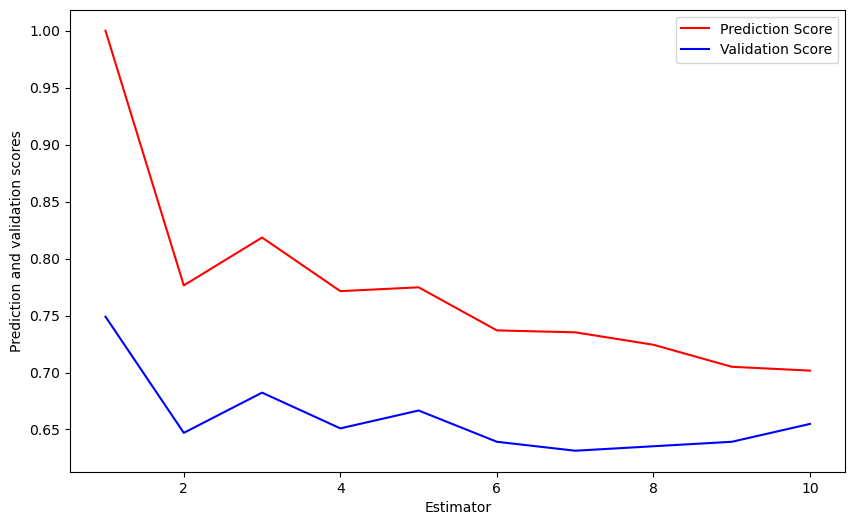

In [83]:
parameters = range(1,11)
plt.figure(figsize=(10, 6))
plt.plot(parameters, pred_scores,color='red',label='Prediction Score')
plt.plot(parameters,val_scores,color='blue',label='Validation Score')
plt.xlabel("Estimator")
plt.ylabel("Prediction and validation scores")
plt.legend()
plt.show()

### Le graphe ci-dessus nous montre l'évolution des scores en fonction du K(nombre de voisins).
### On remarque que plus K augmente et plus le score de prédiction diminue. Le modèle tolère de plus en plus d'erreurs

In [84]:
best_estimator = val_scores.index(max(val_scores))
best_n_n = pruned_models_nn[best_estimator]
best_n_n

KNeighborsClassifier(n_neighbors=1)

### Le meilleur modèle choisi ici est celui où K=1

In [86]:
best_n_n.score(arabic_test.iloc[:,1:],arabic_test.label)

0.7294117647058823

In [91]:
# we put this predictions in a DataFrame with the right format expected by kaggle
predictions_knn = best_n_n.predict(competition)
print(predictions_knn)
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = predictions_knn
df
df.to_csv('knn_prediction_submission.csv', index=False)


[22 16 16 16 16  6 18  2  6  6  2  6  6 22  6  1 22 18 18 16  2  1 12 22
 12  1 16  6  1  2  6  2 16  1 18  2  1  1  1 18 16 22  2 18  2 16  1 12
  1 18  6  1  1  1 18 18  6  2  2 18  2 22  1  1  6 18  2  1 16 16  6  6
  2 18  2  6  2 22  1  1 22  2  1  6 22  6  1 12  6 12 22 22 22  1 12  2
  1  2  2 12 16 12 16  6 22 12  2  2 18  2 12  2 18  1 16  2  2 16  6 18
  1  2  2 16  1 16  1  2  1  2  6  6  6 12  2  2 18  2  1  2  2 18  2  2
 22  6  6 22 12 18  6 18  1 18 22 18 18 16  2  1  1 18 18 18 16 18 18 16
  1  1  6  2  2 16 16  6 22 12  2  1  1 16  1  6  2 12 22  2  6 16  6  1
  1  6 18  6  1  1 22  2  1  6 22  2  2  1  1  1 12  6 12  6  1  1 18 18
 18 18 12  2  1  1 18  1  1  2  1  1  2  6 18 16 18  6  1 16 12  1  6  1
 22 16  2 18  6 22  2 18  6  1 18  6  2  2 16 12 12  2 16 18  2  1  6  1
  6  2  6  2 22  6  6  2  2 22 18  1 18 18 22  2 12  6  2  6  2  1 18 12
  1 18 12  2 22 16  6 18  1  2  2 16 22  6 12  6  2  6  2  2  2  2 12  6
 16  1 18  2 12 16 22  6  1 12  1  6  2  6 18 12 18

### Après soumission sur Kaggle le SVM Gaussien a un score de 0.63 moins bon que le modèle SVM RBF 
### On décide de le garder en attendant le modèle de SVM Gaussien jusque là meilleur des modèles en attendant de voir les autres algorithmes

### Random forest

In [35]:
# TODO

### Logistic regression

In [36]:
# TODO

## Part 3 : using HOG representation

### Decision trees

In [ ]:
# TODO

### SVM

In [39]:
# TODO

### K-nearest-neighbour

In [40]:
# TODO

### Random forest

In [41]:
# TODO

### Logistic regression

In [42]:
# TODO